# Imports

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

#### Data Import

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


#### visualise the model

<AxesSubplot:xlabel='wt', ylabel='mpg'>

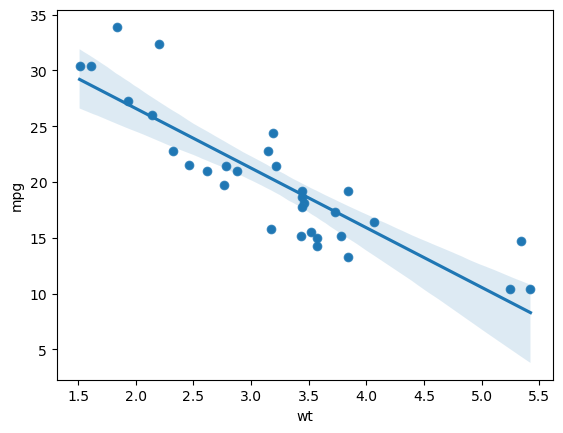

In [3]:
sns.scatterplot(x = "wt", y = "mpg", data = cars)
sns.regplot(x = "wt", y = "mpg", data = cars)

#### Convert data to tensor

In [4]:
x_list = cars.wt.values
print(cars.wt.values.shape)
x_np = np.array(x_list, dtype=np.float32).reshape(-1, 1)
print(x_np.shape)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1, 1)
print(y_np.shape)
x = torch.from_numpy(x_np)
y = torch.tensor(y_list)

(32,)
(32, 1)
(32, 1)


## Training

In [5]:
w = torch.rand(1, requires_grad = True, dtype = torch.float64)
b = torch.rand(1, requires_grad = True, dtype = torch.float64)

num_epochs = 1000
learning_rate = 1e-3
for epoch in range(num_epochs):
    for i in range(len(x)):
        # x, y = torch.tensor(x_list[i]), torch.tensor(y_list[i]) since we have done this step above we don't need to use it
        
        # forward pass
        y_predict = x[i] * w + b
        
        # Calculate loss
        loss_tensor = torch.pow(y_predict - y[i], 2) # least square
        
        # backward pass
        loss_tensor.backward() # gradients calculated
        
        # extract losses
        loss_value = loss_tensor.data[0]
        
        # update weights and biases
        with torch.no_grad(): # Since we do all the steps manually we don't need to go with grads
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate
            w.grad.zero_() # clear the grads for the next epoch
            b.grad.zero_()
    print(loss_value.numpy())

143.07974911830775
76.69841668144488
53.14887927813338
43.66638594071209
39.44927461277488
37.384802587209805
36.24611867597685
35.51691622325875
34.972264952209315
34.512493040673554
34.0930690616746
33.69401169775864
33.30632787140778
32.92595468754691
32.55104387570439
32.18074258664691
31.8146456096632
31.4525491745354
31.094340281783225
30.739946950581466
30.389315850747305
30.04240224508698
29.699165465897806
29.359566879385692
29.02356896855447
28.691134918924604
28.362228430319295
28.03681363029781
27.714855033303024
27.396317520378965
27.081166328153966
26.769367042007357
26.4608855911362
26.15568824449349
25.853741607136474
25.55501261677772
25.259468540444328
24.967076971203706
24.677805824936936
24.391623337149774
24.108498059819073
23.82839885827059
23.551294908088437
23.277155692055313
23.005950997122444
22.7376509114095
22.47222582123432
22.209646408171167
21.949883646138353
21.692908798514274
21.438693415281584
21.187209330199646
20.938428658004796
20.692323791637556
20

0.016979202731966472
0.018022303003907853
0.019091164252202714
0.020185359101966418
0.02130446521120682
0.022448065217465226
0.023615746685015072
0.024807102052601684
0.026021728581712766
0.027259228305348365
0.028519207977331106
0.02980127902217108
0.03110505748531321
0.032430163984067395
0.03377622365891074
0.03514286612527833
0.036529725425959704
0.03793643998385491
0.0393626525552862
0.040808010183760436
0.04227216415417704
0.04375476994756284
0.045255487196215874
0.04677397963931916
0.04830991507901229
0.04986296533693437
0.05143280621113656
0.05301911743352821
0.054621582627676864
0.05623988926710882
0.05787372863394953
0.05952279577806047
0.06118678947661276
0.06286541219393822
0.06455837004194376
0.06626537274084053
0.06798613358032297
0.06972036938111414
0.07146780045688547
0.0732281505766495
0.07500114692741278
0.07678652007732253
0.07858400393913559
0.08039333573405123
0.08221425595599144
0.08404650833612053
0.08588983980784053
0.08774400047208226
0.08960874356298998
0.09148

0.721837374087848
0.7225566239211507
0.7232727098368302
0.7239856438457607
0.7246954379339386
0.7254021040622537
0.7261056541662355
0.7268061001560681
0.7275034539160578
0.7281977273046901
0.7288889321544008
0.7295770802713599
0.7302621834352244
0.7309442533991337
0.7316233018893717
0.7322993406052337
0.7329723812189359
0.7336424353754102
0.7343095146921633
0.7349736307590274
0.735634795138147
0.736293019363776
0.7369483149420318
0.737600693350984
0.7382501660403455
0.7388967444312909
0.7395404399165002
0.7401812638599988
0.740819227596846
0.7414543424332292
0.7420866196462282
0.7427160704838541
0.7433427061646449
0.743966537877873
0.7445875767832856
0.7452058340109412
0.7458213206612975
0.7464340478049032
0.7470440264825933
0.7476512677049632
0.7482557824526954
0.748857581676301
0.7494566762960128
0.7500530772017193
0.75064679525296
0.751237841278799
0.7518262260777123
0.7524119604176002
0.7529950550356134
0.753575520638255
0.7541533679011094
0.7547286074689717
0.7553012499556887
0.75

## Check results

In [6]:
print(f"Weight: {w.item()}, Bias: {b.item()}")

Weight: -5.229521480518631, Bias: 36.805791198255534


In [7]:
y_pred = (torch.tensor(x_list) * w + b).detach().numpy() # detach() used for remove the gradient information of the tensor.
# We will do this to turn tensors that have gradient information to numpy array
y_pred

array([23.10444492, 21.77091694, 24.67330136, 19.99287964, 18.81623731,
       18.71164688, 18.13639951, 20.12361768, 20.33279853, 18.81623731,
       18.81623731, 15.52163877, 17.29967608, 17.0382    ,  9.35080343,
        8.44086669,  8.85399888, 25.30084394, 28.36011401, 27.20961928,
       23.91502075, 18.39787559, 18.84238491, 16.72442871, 16.69828111,
       26.68666713, 25.61461523, 28.8935252 , 20.22820811, 22.3200167 ,
       18.13639951, 22.26772148])

<AxesSubplot:>

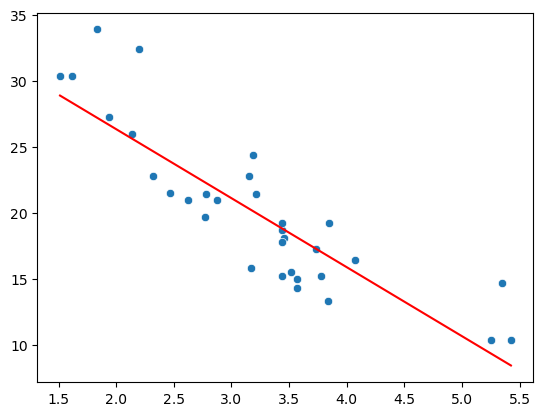

In [8]:
sns.scatterplot(x = x_list, y = y_list)
sns.lineplot(x = x_list, y = y_pred, color = "red")

## (Statistical) Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}") # Very close to what we have found

Slope: [-5.344472], Bias: 37.285125732421875


## Create graph visualisation

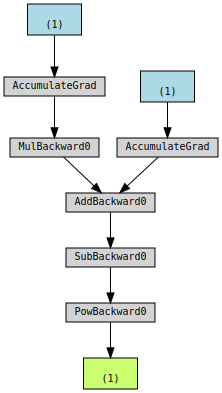

In [10]:
# make sure GraphViz is installed (https://graphviz.org/download/)
# if not computer restarted, append directly to PATH variable
import os
from torchviz import make_dot
os.environ['PATH'] += os.pathsep + '/home/furkan/anaconda3/lib/python3.9/site-packages'
make_dot(loss_tensor)